In [2]:
# Importar bibliotecas
import PIL
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import numpy as np
import pandas as pd
import math

# Abrir imagem, converter para escala de cinza e pegar dimensões
data = Image.open("Y147.jpg")
data = data.convert('L')
ny, nx = data.size


# Transformar Imagem em array
data = np.array(data.getdata()).reshape(data.size[1], data.size[0], 1)
print(nx, " ", ny, " ", data.size)

348   287   99876


In [3]:
# Inicializa os centroides, o valor deles é igualmente distribuido no espaço de 0 a 255 pixels

# Pede ao usuário para determinar o número de clusters
k = int(input("Insert k number of clusters, it must be an integer: "))
i=2
centroids = {}
coordenate = [0,0]
centroids[1] = 0
v_pixel = 255/k
while(i<=(k)):
    centroids[i] = i*v_pixel
    i+=1
centroids

Insert k number of clusters, it must be an integer: 5


{1: 0, 2: 102.0, 3: 153.0, 4: 204.0, 5: 255.0}

In [6]:
# Cria Dataframe para armazenar posição valor e centroid do pixel
df_img = pd.DataFrame(columns=["pos", "value", "centroid"])

In [7]:
# Define os clusters dos pixels da imagem e atribui os valores ao Dataframe

# Nesse caso é considera apenas uma característica o valor do pixel

count_2 = 0

# Itera sobre o array
for row in data:
    count_1 = 0
    for pixel in row:
        lowest_distance = -1
        closest_cluster = -1
        
        # Itera sobre valores dos centroids
        for c,values in centroids.items():
            
            # Calcula distâncias e atribui ao pixel o cluster cuja distância dele ao seu centroid seja miníma
            distance = abs(int(pixel) - values[2])
            if lowest_distance == -1:
                lowest_distance = distance
                closest_cluster = c
            elif distance < lowest_distance:
                lowest_distance = distance
                closest_cluster = c
                
        # Adiciona valores ao Dataframe
        df_img = df_img.append({'linha' : count_1, 'coluna' : count_2, 'value' : pixel, 'centroid' : closest_cluster}, 
                ignore_index = True)
        count_1 +=1
    count_2 += 1
df_img.head()

,linha,coluna,value,centroid
0,0,0,0,1
1,1,0,0,1
2,2,0,0,1
3,3,0,0,1
4,4,0,0,1


In [8]:
df_img["centroid"].value_counts()

2    49592
1    44486
3     4848
4      684
5      266
Name: centroid, dtype: int64

In [9]:
# Faz 10 iterações para achar os clusters finais
m=0
while m<10:
    i=1
    centroid = {}
    
    # Define novos centroids como a média dos valores que compôem o cluester
    while i<=k:
        centroid[i] = df_img[df_img["centroid"]==i]["value"].mean()
        i+=1
    
    # Reatribui os pixels aos centroids com base na distância
    for pixel in df_img["value"]:
        lowest_distance = -1
        closest_cluster = -1
        count = 0
        for c,values in centroid.items():
            distance = abs(pixel[0] - values)
            if lowest_distance == -1:
                lowest_distance = distance
                closest_cluster = c
            elif distance < lowest_distance:
                lowest_distance = distance
                closest_cluster = c
        df_img["centroid"][count] = closest_cluster
        count += 1
    m += 1

In [10]:
df_img["centroid"].value_counts()

2    49592
1    44486
3     4848
4      684
5      266
Name: centroid, dtype: int64

In [11]:
centroid

{1: 10.81171604549746,
 2: 77.01046539764478,
 3: 141.28114686468646,
 4: 206.77923976608187,
 5: 238.33834586466165}

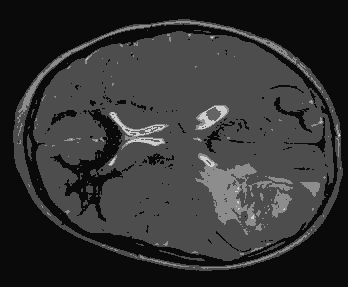

In [13]:
# Cria nova imagem onde o valor dos pixels é o valor médio do cluster a que pertencem

new_image = Image.new(mode = "L", size = (ny,int(nx)), color = 100)
for linha, coluna, n_centroid in zip(df_img["linha"],df_img["coluna"], df_img["centroid"]):
    for n in range(1,k+1):
        if n_centroid == n:
            new_image.putpixel((linha, coluna), math.floor(centroid[n_centroid]))
new_image

In [14]:
# Salva a imagem
new_image.save("Y100K1.jpeg", 'jpeg')